<a href="https://colab.research.google.com/github/Kr-Jishnu/Calculator/blob/main/olympics__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("//content/Summer-Olympic-medals-1976-to-2008.csv", encoding="latin1")
print(df.head())
print(df.info())
print(df.isnull().sum())




       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (to

In [ ]:
df = df.drop(columns=["Event_gender", "Country_Code"], errors="ignore")
df = df.dropna(how="all")
df = df.dropna()
df["Year"] = df["Year"].astype(int)
df.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [ ]:

q1 = df[["City", "Year"]].drop_duplicates("Year")
print(q1)
print("Total Olympics editions:", q1.shape[0])

              City  Year
0         Montreal  1976
1422        Moscow  1980
2809   Los Angeles  1984
4268         Seoul  1988
5814     Barcelona  1992
7519       Atlanta  1996
9378        Sydney  2000
11393       Athens  2004
13391      Beijing  2008
Total Olympics editions: 9


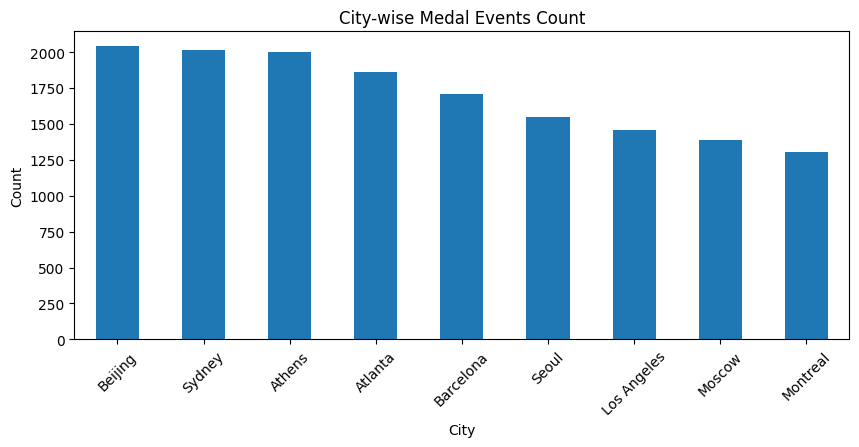

In [ ]:
q2 = df["City"].value_counts()
plt.figure(figsize=(10,4))
q2.plot(kind="bar")
plt.title("City-wise Medal Events Count")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#print(q2.head(10))

Total unique events: 334


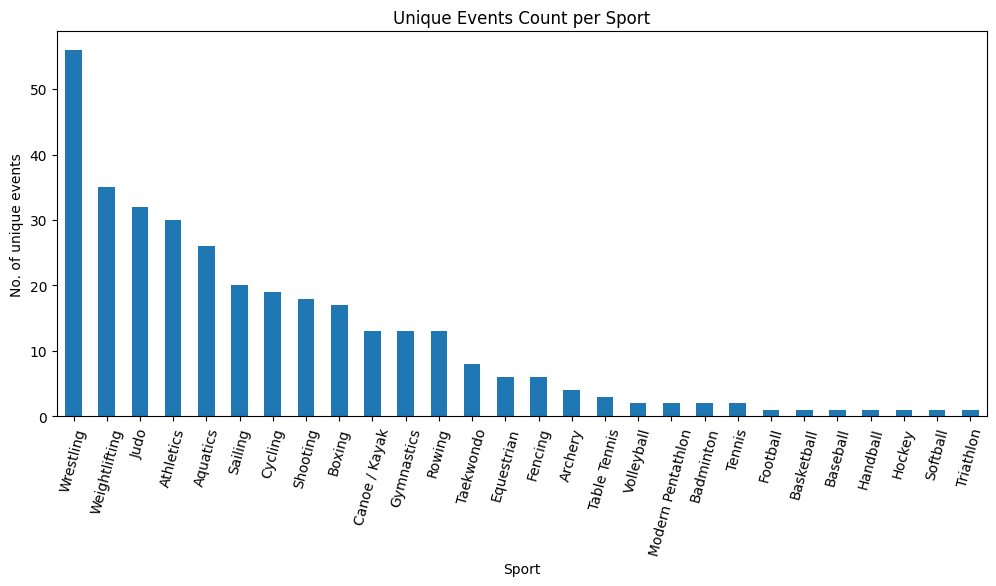

In [ ]:
q3_unique = df[["Sport", "Discipline", "Event"]].drop_duplicates()
print("Total unique events:", len(q3_unique))
q3_sports = q3_unique.groupby("Sport").size().sort_values(ascending=False)
plt.figure(figsize=(12,5))
q3_sports.plot(kind="bar")
plt.title("Unique Events Count per Sport")
plt.xlabel("Sport")
plt.ylabel("No. of unique events")
plt.xticks(rotation=75)
plt.show()
#print(q3_sports.head(10))

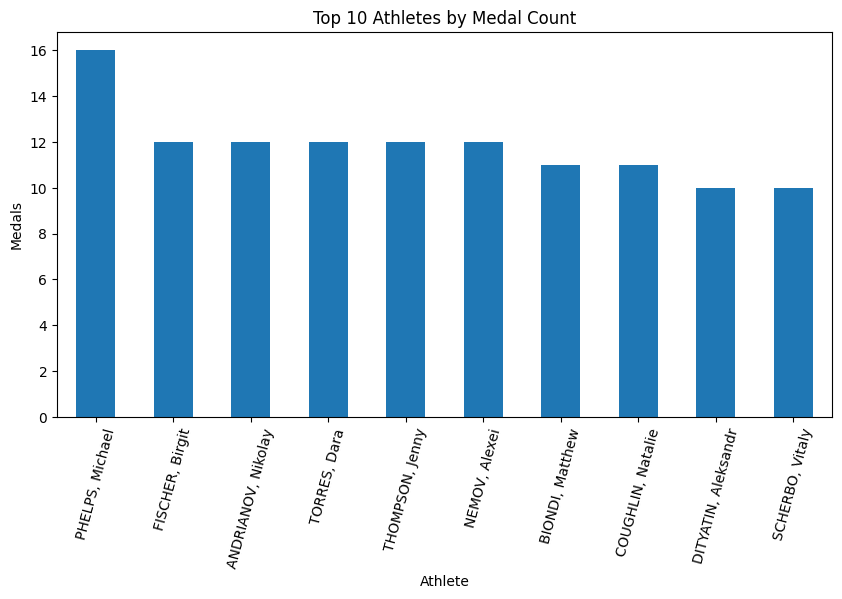

In [ ]:
q4 = df.groupby("Athlete")["Medal"].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
q4.plot(kind="bar")
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Medals")
plt.xticks(rotation=75)
plt.show()
#print(q4)

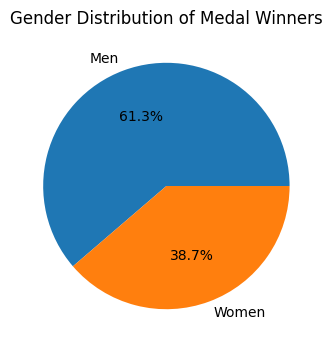

Gender
Men      9388
Women    5928
Name: count, dtype: int64


In [ ]:
q5 = df["Gender"].value_counts()
plt.figure(figsize=(6,4))
q5.plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution of Medal Winners")
plt.ylabel("")
plt.show()
print(q5)

In [ ]:
q6 = df.groupby(["Year", "Country", "Medal"], observed=False).size().reset_index(name="Count")
q6["Medal"] = pd.Categorical(q6["Medal"], categories=["Gold", "Silver", "Bronze"], ordered=True)
q6 = q6.sort_values(["Year", "Country", "Medal"])
q6_pivot = q6.pivot_table( index=["Year", "Country"],  columns="Medal", values="Count",  fill_value=0,  observed=False).reset_index()
q6_pivot["Sum"] = q6_pivot["Gold"] + q6_pivot["Silver"] + q6_pivot["Bronze"]
q6_pivot = q6_pivot.sort_values(["Year", "Sum"], ascending=[True, False])
print(q6_pivot.head(20))

Medal  Year         Country   Gold  Silver  Bronze    Sum
30     1976    Soviet Union  113.0    93.0    79.0  285.0
10     1976    East Germany   99.0    51.0    42.0  192.0
37     1976   United States   63.0    56.0    36.0  155.0
39     1976    West Germany   21.0    24.0    30.0   75.0
26     1976          Poland   18.0    29.0    26.0   73.0
13     1976         Hungary   14.0     6.0    35.0   55.0
29     1976         Romania    4.0    28.0    23.0   55.0
17     1976           Japan   25.0     6.0    10.0   41.0
5      1976        Bulgaria    8.0    13.0    18.0   39.0
36     1976  United Kingdom    6.0    15.0    11.0   32.0
15     1976           Italy    2.0    25.0     4.0   31.0
23     1976     New Zealand   17.0     1.0     9.0   27.0
0      1976       Australia    0.0    16.0     8.0   24.0
7      1976            Cuba    6.0     4.0    14.0   24.0
6      1976          Canada    0.0     8.0    12.0   20.0
12     1976          France    5.0     7.0     8.0   20.0
40     1976   

In [ ]:
q7 = df.groupby(["Sport","Country"]).size().reset_index(name="Count")
q7 = q7.sort_values(["Sport","Count"], ascending=[True, False])
sports_list = q7["Sport"].unique()
top_3_all_sports = q7.groupby("Sport").head(3)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(top_3_all_sports)

                 Sport         Country  Count
43            Aquatics   United States    578
1             Aquatics       Australia    239
28            Aquatics          Russia    125
56             Archery    Korea, South     52
67             Archery   United States     19
49             Archery           China     15
142          Athletics   United States    299
128          Athletics    Soviet Union    115
90           Athletics    East Germany    107
145          Badminton           China     47
148          Badminton    Korea, South     31
147          Badminton       Indonesia     26
153           Baseball            Cuba    111
157           Baseball   United States     68
154           Baseball           Japan     64
172         Basketball   United States    192
173         Basketball      Yugoslavia     84
169         Basketball    Soviet Union     72
186             Boxing            Cuba     56
232             Boxing   United States     42
219             Boxing          Ru

In [ ]:
ath_sport = df[["Athlete","Sport"]].drop_duplicates()
multi_sport_athletes = ath_sport.groupby("Athlete").filter(lambda x: x["Sport"].nunique() > 1)
multi_sport_athletes = multi_sport_athletes.groupby("Athlete")["Sport"].apply(list)
print("Athletes who won medals in multiple sports:")
print(multi_sport_athletes.head(30))

Athletes who won medals in multiple sports:
Athlete
BELOVA, Irina               [Athletics, Gymnastics]
CHEN, Jing               [Table Tennis, Volleyball]
DIMITROV, Stefan        [Volleyball, Weightlifting]
GAVRILOV, Yuri                 [Football, Handball]
GONZALEZ, Raul                [Athletics, Handball]
KOLESNIKOV, Nikolai      [Athletics, Weightlifting]
KOVACS, Istvan                  [Wrestling, Boxing]
KOVALENKO, Alexandre          [Athletics, Aquatics]
KUZNETSOV, Mikhail          [Rowing, Canoe / Kayak]
KUZNETSOV, Nikolai                [Rowing, Cycling]
LEE, Eun Kyung                    [Archery, Hockey]
LI, Na                          [Aquatics, Fencing]
LI, Ting                         [Aquatics, Tennis]
OVCHINNIKOVA, Elena          [Volleyball, Aquatics]
ROMERO, Rebecca                   [Rowing, Cycling]
THOMPSON, Richard             [Baseball, Athletics]
TOMA, Sanda                 [Rowing, Canoe / Kayak]
WANG, Liping                  [Football, Athletics]
WELLS, Matth

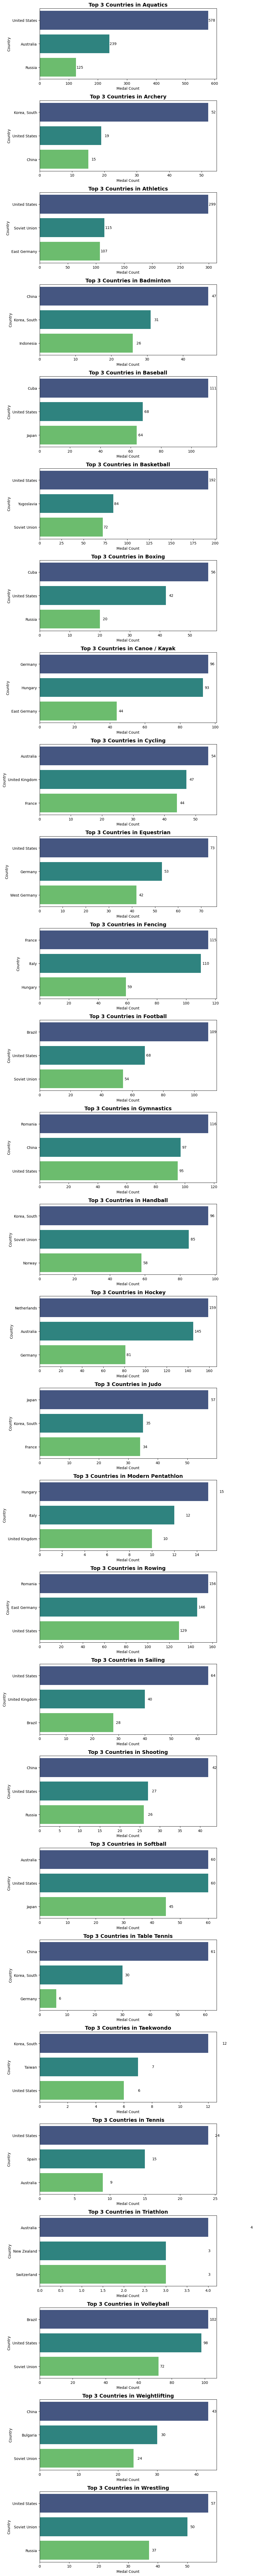

In [ ]:
sports_list = q7["Sport"].unique()
num_sports = len(sports_list)
fig, axes = plt.subplots(nrows=num_sports, ncols=1, figsize=(10, num_sports * 3.5), sharex=False)
if num_sports == 1:
    axes = [axes]

for i, sport in enumerate(sports_list):

    sport_data = top_3_all_sports[top_3_all_sports["Sport"] == sport]
    sns.barplot(data=sport_data,  x="Count",  y="Country",  hue="Country",  legend=False,    palette="viridis", ax=axes[i])
    axes[i].set_title(f"Top 3 Countries in {sport}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Medal Count")
    axes[i].set_ylabel("Country")
    for index, value in enumerate(sport_data["Count"]):
        axes[i].text(value + 1, index, str(value), color='black', va='center')

plt.tight_layout()
plt.show()

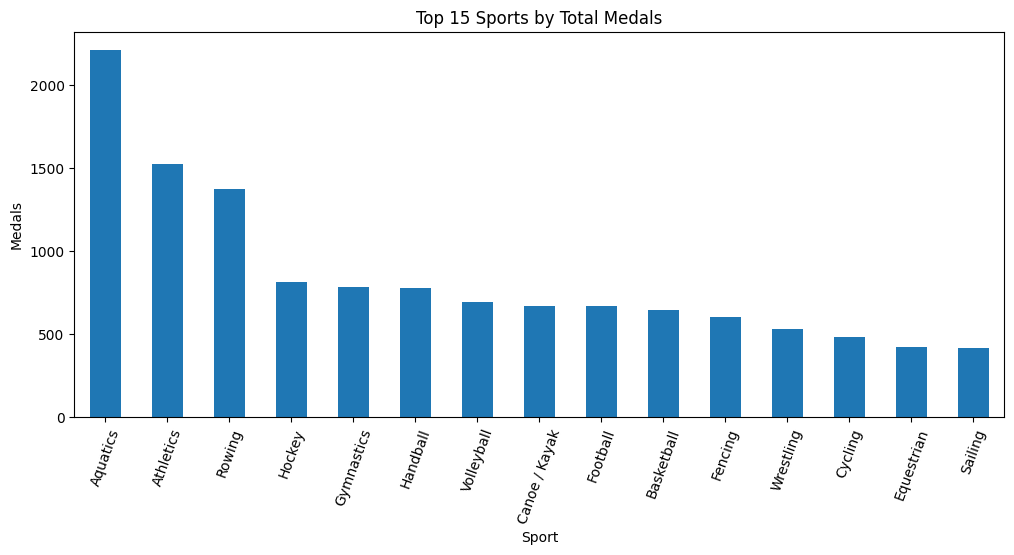

In [ ]:
sport_medals = df.groupby("Sport")["Medal"].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,5))
sport_medals.plot(kind="bar")
plt.title("Top 15 Sports by Total Medals")
plt.xlabel("Sport")
plt.ylabel("Medals")
plt.xticks(rotation=70)
plt.show()


In [ ]:



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ml_df = df.copy()
ml_df["Won_Medal"] = 1
fake = ml_df.sample(frac=0.35, random_state=42).copy()
fake["Won_Medal"] = 0
final_ml = pd.concat([ml_df, fake], ignore_index=True)
final_ml = final_ml.dropna(subset=["Country", "Sport", "Gender", "Discipline", "City", "Year"])
encode_cols = ["Country", "Sport", "Gender", "Discipline", "City"]
le_dict = {}
for col in encode_cols:
    le = LabelEncoder()

    final_ml[col] = le.fit_transform(final_ml[col].astype(str))
    le_dict[col] = le

X = final_ml[["Country", "Sport", "Gender", "Discipline", "City", "Year"]]
y = final_ml["Won_Medal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy Score: 0.7445196647324307

Confusion Matrix:
 [[   0 1585]
 [   0 4619]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1585
           1       0.74      1.00      0.85      4619

    accuracy                           0.74      6204
   macro avg       0.37      0.50      0.43      6204
weighted avg       0.55      0.74      0.64      6204



In [ ]:

le_dict={}
from sklearn.preprocessing import LabelEncoder
encode_cols = ["Country", "Sport", "Gender", "Discipline", "City"]
for col in encode_cols:
    le = LabelEncoder()
    final_ml[col] = le.fit_transform(final_ml[col].astype(str))
    le_dict[col] = le

new_data = {
    "Country": "India",
    "Sport": "Shooting",
    "Gender": "Male",
    "Discipline": "Rifle",
    "City": "Athens",
    "Year":  2004
}

new_df = pd.DataFrame([new_data])

for col in ["Country", "Sport", "Gender", "Discipline", "City"]:
    if new_df[col][0] in le_dict[col].classes_:
        new_df[col] = le_dict[col].transform(new_df[col])
    else:
        new_df[col] = 0

prediction = model.predict(new_df)
prob = model.predict_proba(new_df)

print("Prediction:", prediction)
print("Probability:", prob)

Prediction: [1]
Probability: [[0.26793161 0.73206839]]
